In [ ]:
# Reference: https://pypi.org/project/diffusers/

#### Setup

In [1]:
!pip install diffusers[torch] transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 14.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.1/775.1 KB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 6.9 MB/s eta 0:00:00


In [2]:
!apt-get install git-lfs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 58 not upgraded.
Need to get 3503 kB of archives.
After this operation, 10.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 git-lfs amd64 3.0.2-1ubuntu0.2 [3503 kB]
Fetched 3503 kB in 1s (6674 kB/s)
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package git-lfs.
(Reading database ... 18580 files and directories currently installed.)
Preparing to unpack .../git-lfs_3.0.2-1ubuntu0.2_amd64.deb ...
Unpacking git-lfs (3.0.2-1ubuntu0.2) ...
Setting up git-lfs (3.0.2-1ubuntu0.2) ...


In [3]:
%mkdir -p /pt/diffusers/stable-diffusion-v1-5
%cd /pt/diffusers/stable-diffusion-v1-5

!git lfs install

%cd /pt/diffusers/
#!git lfs

/pt/diffusers/stable-diffusion-v1-5
Git LFS initialized.
/pt/diffusers


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
!git clone https://huggingface.co/runwayml/stable-diffusion-v1-5

#### Load pipelines and download files

In [4]:
import torch
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline

device = "cuda"
model_id = "runwayml/stable-diffusion-v1-5"

# Safety Checker turned off to free GPU memory - https://github.com/CompVis/stable-diffusion/issues/86
# Memory management options - using 16-bit floats
safety_checker = None
torch_dtype = torch.float16
variant = "fp16"

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]


In [5]:
stable_diffusion_txt2img = StableDiffusionPipeline.from_pretrained(model_id, variant=variant, torch_dtype=torch_dtype, safety_checker=safety_checker)

components = stable_diffusion_txt2img.components

# weights are not reloaded into RAM - https://huggingface.co/docs/diffusers/using-diffusers/loading#loading-customized-pipelines
stable_diffusion_img2img = StableDiffusionImg2ImgPipeline(**components)

Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 11.04it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not 

#### Text-to-Image generation with Stable Diffusion

100%|██████████| 50/50 [00:03<00:00, 14.42it/s]


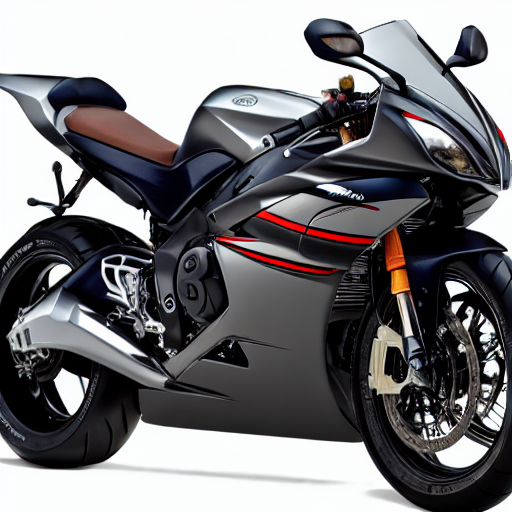

In [28]:
stable_diffusion_txt2img = stable_diffusion_txt2img.to(device)

prompt = "high resolution picture of novel sport bike"
image = stable_diffusion_txt2img(prompt).images[0]

from IPython import display
display.display(image)

In [29]:
# Optionally save output
image.save("./output/sport-bike.png")

 #### Image-to-Image text-guided generation with Stable Diffusion

In [31]:
!pip install requests

In [38]:
import os.path
url, filename = ("https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/txt2img-convsample.png", "./input/txt2img-convsample.jpg")

if os.path.isfile(filename):
    print("Image file exists")
else:
    import urllib.request
    urllib.request.urlretrieve(url, filename)
    print("Image file downloaded")
    

Image file exists


In [37]:
from PIL import Image

# Memory management options = image size set to 512, 512
image_size = (512, 512)
filename = "./input/txt2img-convsample.jpg"

init_image = Image.open(filename).convert("RGB")
init_image = init_image.resize(image_size)
#display.display(init_image)

prompt =  "A fantasy landscape, trending on artstation"

stable_diffusion_img2img = stable_diffusion_img2img.to(device)

100%|██████████| 75/75 [00:05<00:00, 14.53it/s]


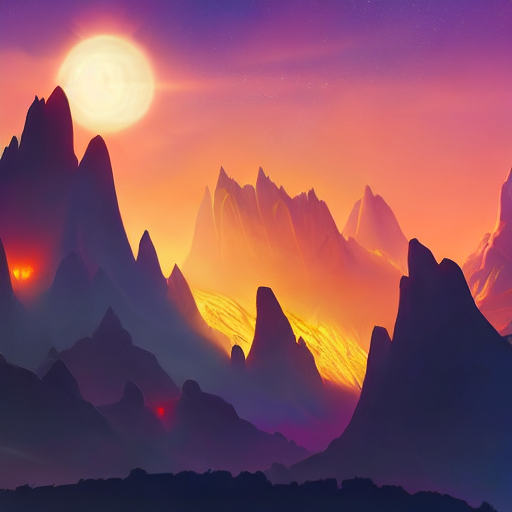

In [39]:
generator = torch.Generator(device=device).manual_seed(1024)
images = stable_diffusion_img2img(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5, generator=generator, num_inference_steps=100).images

from IPython import display
display.display(images[0])

In [40]:
# Optionally save output
images[0].save("./output/txt2img-convsample.jpg")

 #### Save variant pipeline checkpoint

In [ ]:
stable_diffusion_img2img.save_pretrained("./stable-diffusion-v1-5", variant=variant)